In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [194]:
def barplot(dataframe, x_attribute, y_attribute):
    sns.barplot(x=x_attribute, y=y_attribute, data=living_cost_USA_state_52, errorbar=None)
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.title(y_attribute + ' Index by' + x_attribute + ' compared to NY')
    plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
    plt.show()

We first load the datasets independtly and clean them a bit.

In [2]:
# load the datasets for living cost in USA
living_cost_USA = pd.read_csv("data/living_cost_USA.csv", sep=",")

In [3]:
# load the datasets for living cost in USA by STATE
living_cost_USA_by_STATE = pd.read_csv("data/living_cost_USA_by_STATE.csv", sep=",")

In [102]:
# load the datasets for pizzas
# pizza_places = pd.read_csv("data/db_main.csv")
pizza_places = pd.read_csv("data/db_main.csv", sep=",")

In [103]:
pizza_places.columns

Index(['id', 'address', 'categories', 'city', 'country', 'keys', 'latitude',
       'longitude', 'menuPageURL', 'menus.amountMax', 'menus.amountMin',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'name', 'postalCode', 'priceRangeCurrency', 'priceRangeMin',
       'priceRangeMax', 'province', 'state'],
      dtype='object')

In [122]:
pizza_places

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,state
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,Oregon
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,Oregon
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood,California
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood,California
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,11.99,...,2016-07-06T20:05:49Z,NaN,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek,Missouri
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,9.99,...,2016-07-06T20:05:49Z,NaN,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek,Missouri
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,5.00,...,2015-10-23T01:03:47Z,NaN,Pita Pizza,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg,Pennsylvania
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,20.00,...,2015-10-23T01:03:47Z,NaN,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg,Pennsylvania


In [114]:
pizza_places_resume = pizza_places[['name', 'menus.name', 'province', 'state', 'menus.amountMax']]

In [116]:
pizza_places_resume.sample(3)

,name,menus.name,province,state,menus.amountMax
1135,Kimono Japanese & Chinese Restaurant,Chinese Pizza,PA,Pennsylvania,4.25
2401,Mamas Pizza,Barbeque Pizza,OH,Ohio,14.20
2950,Gusto,Panini Alla Pizza,NY,New York,8.25


In [8]:
# load the datasets for pizza ingredients
pizza_with_ingredients = pd.read_csv("data/pizzas.csv", sep=";")

In [9]:
pizza_with_ingredients = pizza_with_ingredients[['pizza_name', 'pizza_category','pizza_ingredients']].drop_duplicates().reset_index(drop=True)

In [10]:
pizza_with_ingredients.sample(3)

,pizza_name,pizza_category,pizza_ingredients
6,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella..."
4,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
26,The Pepper Salami Pizza,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ..."


---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------


Now we will try to attach to construct a pizza index from theses datasets in order to make comparison between the states.

- First we have to build a mean of pizza prices by states.
- Then we can (as the bigmac_index) compare 2 states by applying the following : mean_price_A / mean_price_B
- Then, for each state we can make a mean of all it's pizza_index with all the other states. But this is not very relevant. Hence we will use the NY state as a reference to compare other states.
- Finally we can compare it to the cost of living in the USA and see how similar the results are.

In [118]:
# mean of the prices by STATE
mean_price_by_state = pizza_places_resume[['state', 'menus.amountMax']].groupby(['state']).mean().rename(columns={"menus.amountMax": "mean_price"})

In [119]:
mean_price_by_state.sample(3)

,mean_price
state,
Idaho,8.150000
Puerto Rico,8.950000
Texas,11.895913


In [120]:
mean_price_by_state_sorted = mean_price_by_state.sort_values(['mean_price'], ascending=False)

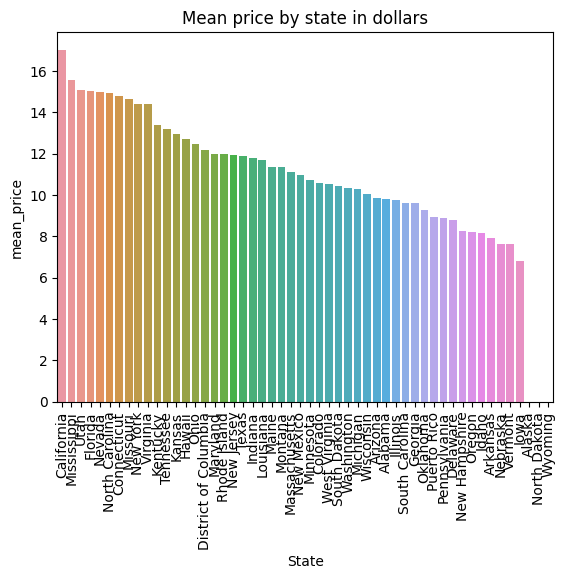

In [123]:
sns.barplot(x=mean_price_by_state_sorted.index, y='mean_price', data=mean_price_by_state_sorted, errorbar=None)
plt.xlabel('State')
plt.ylabel('mean_price')
plt.title('Mean price by state in dollars')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()

We can see that the more expensive states are Washington, Montana and Alaska.

- Now we will design a way to compute the so called pizza_index the same way as the bigmax_index.

In [124]:
def compute_pizza_index_btw_two_states(dataframe, stateA, stateB):
    A = dataframe.at[stateA, 'mean_price']
    B = dataframe.at[stateB, 'mean_price']
    return A/B

In [125]:
compute_pizza_index_btw_two_states(mean_price_by_state, "Montana", "Arizona")

1.150998945998622

In [144]:
# Compute a matrix that has all the pizza_index values

# list of all the states
state_list = mean_price_by_state.index.tolist()
state_list.remove('Alaska')
state_list.remove('Wyoming')
state_list.remove('North Dakota')
numer_of_states = len(state_list)
state_list

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin']

In [145]:
# construct a matrix with theses values
pizza_index_matrix = np.zeros((numer_of_states, numer_of_states))
for i in range(numer_of_states):
    a = state_list[i]
    for j in range(numer_of_states):
        b = state_list[j]
        pizza_index_matrix[i][j] = compute_pizza_index_btw_two_states(mean_price_by_state, a, b)

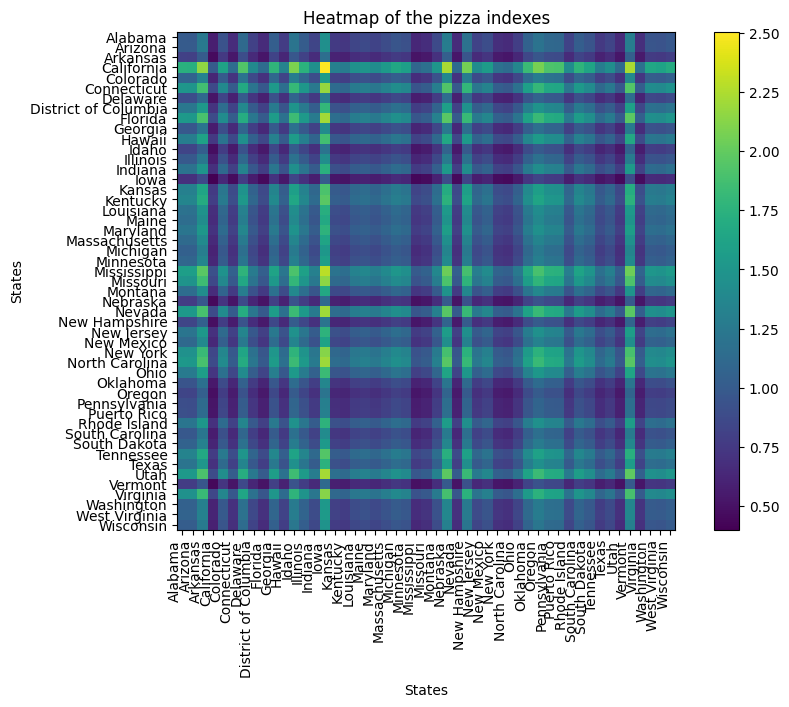

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.imshow(pizza_index_matrix, cmap='viridis')
plt.colorbar()

plt.xticks(np.arange(numer_of_states), state_list, rotation=90, ha='right')
plt.yticks(np.arange(numer_of_states), state_list)

plt.xlabel('States')
plt.ylabel('States')
plt.title('Heatmap of the pizza indexes')

plt.subplots_adjust(bottom=0.05)

plt.show()

In [148]:
pizza_index_means = []
for i in range(numer_of_states):
    mean = (pizza_index_matrix[i].sum() -1) / (numer_of_states -1)
    pizza_index_means.append(mean)

In [149]:
pizza_index = pd.DataFrame({'pizza_index': pizza_index_means}, index=state_list)

In [152]:
pizza_index.sample(3)

,pizza_index
Rhode Island,1.108607
New Mexico,1.014812
South Carolina,0.886909


In [153]:
pizza_index_sorted = pizza_index.sort_values(['pizza_index'], ascending=False)

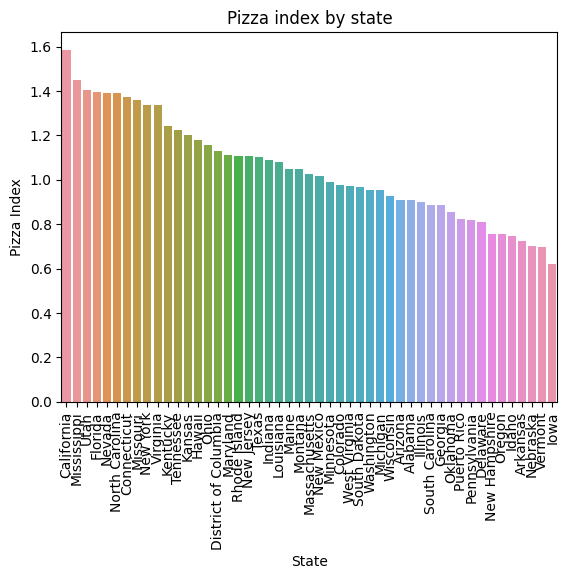

In [154]:
sns.barplot(x=pizza_index_sorted.index, y='pizza_index', data=pizza_index_sorted, errorbar=None)
plt.xlabel('State')
plt.ylabel('Pizza Index')
plt.title('Pizza index by state')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()

But having the mean of the pizza index isn't really relevant, we might aswell order by prices.
We need a baseground to compare it. As the dataset of the living cost by city has done, we are going to measure the pizza_index using the State of NewYork as the reference. This means that the pizza_index of NY will be 1.

In [156]:
NY_price = mean_price_by_state.at['New York', 'mean_price']

In [157]:
mean_price_by_state['pizza_index_NY'] = mean_price_by_state['mean_price']/NY_price

In [160]:
mean_price_by_state.dropna(inplace=True)

In [200]:
mean_price_by_state.sample(3)

,mean_price,pizza_index_NY
state,,
Oklahoma,9.294615,0.645115
Kansas,12.955294,0.899193
Illinois,9.743151,0.676247


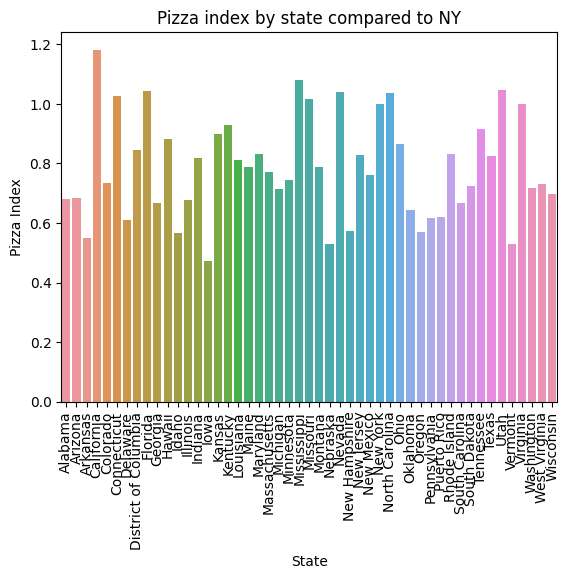

In [203]:
sns.barplot(x=mean_price_by_state.index, y='pizza_index_NY', data=mean_price_by_state, errorbar=None)
plt.xlabel('State')
plt.ylabel('Pizza Index')
plt.title('Pizza index by state compared to NY')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()

Now we have a problem with the states initiales. Indeed it's not the same for the two datasets.

In [53]:
living_cost_USA_by_STATE.sample(5)

,State,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,AK,16.0,93.190,39.45,67.75,96.740,78.76,138.380
40,ID,288.0,59.430,30.85,45.90,50.930,63.79,120.440
15,LA,100.0,73.610,41.21,58.27,67.000,86.02,106.740
18,GA,122.0,72.050,46.89,60.14,66.940,73.06,150.380
25,AL,205.5,65.835,31.34,49.51,64.115,64.77,134.955


In [59]:
state_list_living_cost = living_cost_USA_by_STATE['State'].tolist()

In [79]:
for state in state_list_living_cost:
    state_list_living_cost.remove(state)
    state_list_living_cost.append(state.strip())

In [162]:
# load the datasets for living cost in USA by state with 52 states
living_cost_USA_state_52 = pd.read_csv("data/dataset_living_cost_52_states.csv", sep=",")

In [164]:
state_list_living_cost_51 = living_cost_USA_state_52['State'].tolist()

In [167]:
inter = set(state_list).intersection(set(state_list_living_cost_51))

In [170]:
set(state_list_living_cost_51).difference(set(state_list))

{'Alaska', 'North Dakota', 'Wyoming'}

As we can see, the states that are not present in the dataset are : Alaska, North Dakota and Wyoming because there is no pizza with prices indicated there.

Now we want to recalibrate the living cost index around New york as opposed to Puerto Rico

In [177]:
NY_index = living_cost_USA_state_52.loc[living_cost_USA_state_52['State'] == 'New York', 'Index'].values[0]

In [179]:
adjustement_factor = 100.0/NY_index
living_cost_USA_state_52['Index'] = living_cost_USA_state_52['Index'] * adjustement_factor

We first calculate the adjustment factor for the Index column to make the New York Index value equal to 100.0. Then, we adjust the other columns by multiplying each value with the ratio of the current row's Index value to the New York Index value. This ensures that the relationships and proportions between the columns are maintained while recalibrating the values.

In [181]:
columns_to_adjust = ['Grocery', 'Housing', 'Utilities', 'Transportation', 'Health', 'Misc.']
for column in columns_to_adjust:
    living_cost_USA_state_52[column] = living_cost_USA_state_52[column] * (living_cost_USA_state_52['Index'] / NY_index)

In [183]:
living_cost_USA_state_52.sample(3)

,Rank,State,Initials,Index,Grocery,Housing,Utilities,Transportation,Health,Misc.
15,16,Wyoming,WY,79.467354,70.455592,56.255240,56.323511,66.768962,65.540086,66.154524
50,51,Maryland,MD,113.316151,110.492982,124.998229,107.085710,124.998229,124.998229,129.671060
39,40,Washington,WA,98.109966,91.451300,106.201509,74.509630,96.171367,101.650016,95.328498


In [187]:
living_cost_USA_state_52 = living_cost_USA_state_52.sort_values('State')

In [189]:
states_to_remove = ['Wyoming', 'North Dakota', 'Alaska']
mask = ~living_cost_USA_state_52['State'].isin(states_to_remove)
living_cost_USA_state_52 = living_cost_USA_state_52[mask]

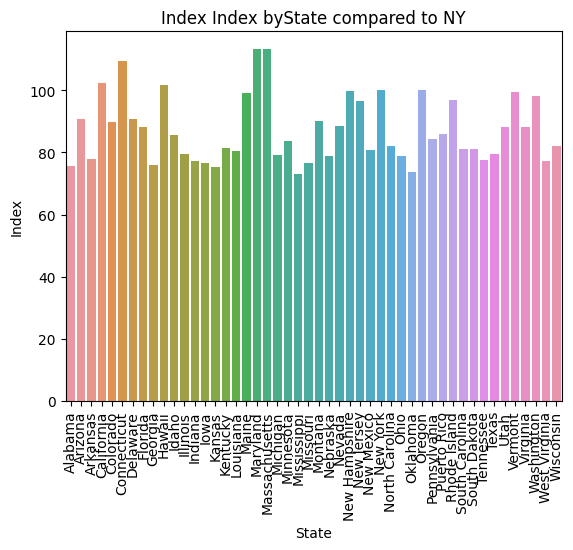

In [195]:
barplot(living_cost_USA_state_52, 'State', 'Index')

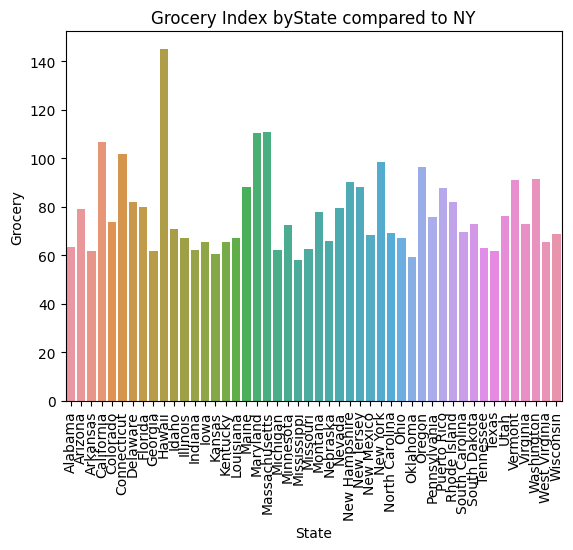

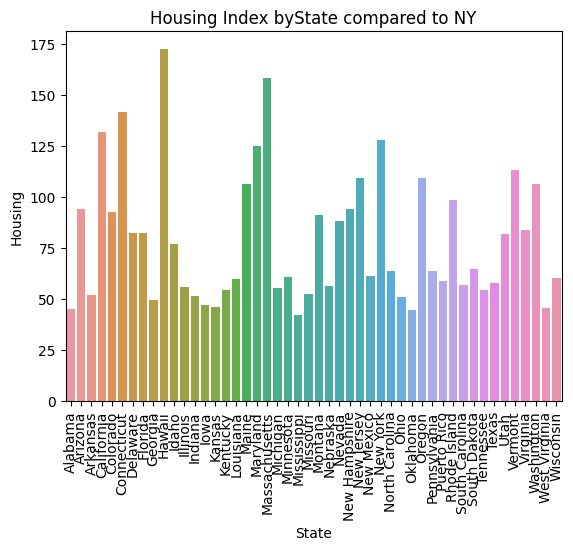

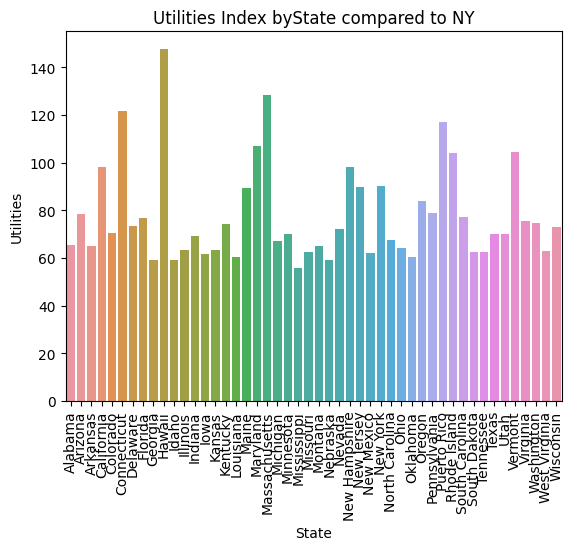

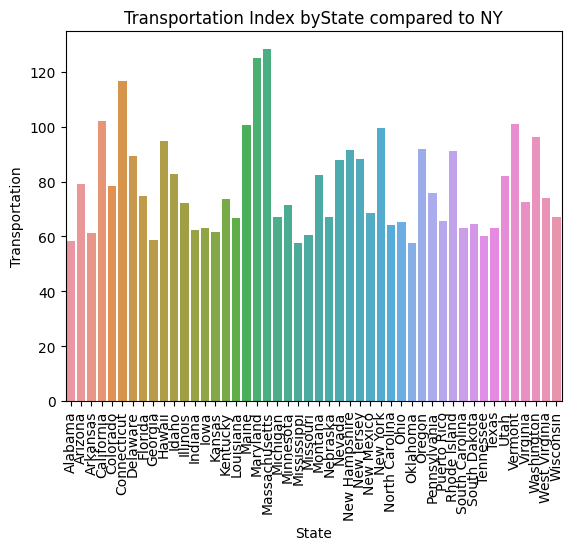

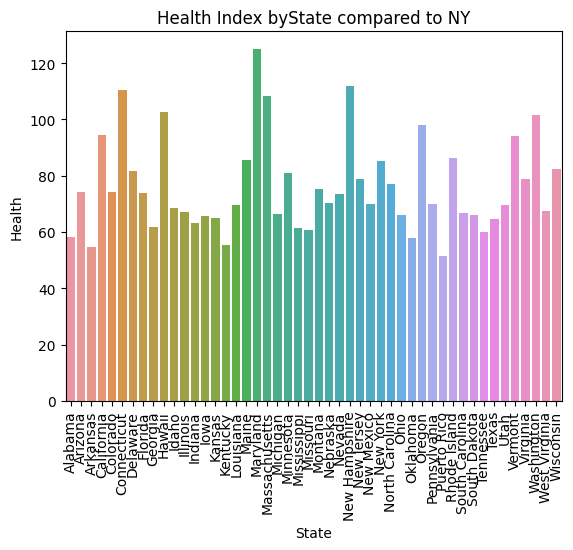

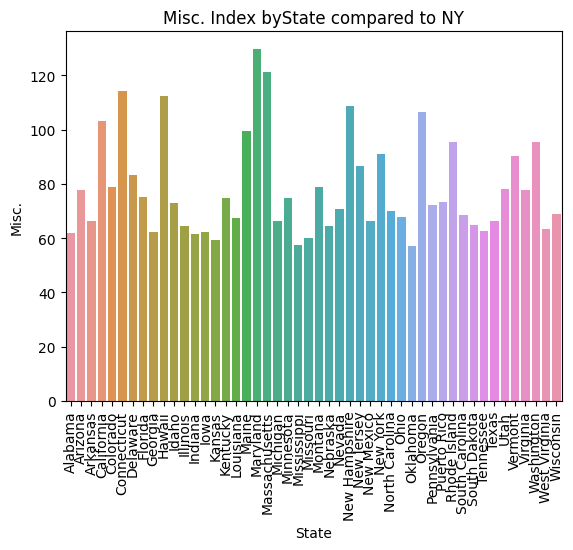

In [198]:
for col in columns_to_adjust:
    barplot(living_cost_USA_state_52, 'State', col)

Now it's time to merge these dataframes?
And calculate how far from the the social dataset the pizza index is.

In [204]:
merged_df = living_cost_USA_state_52.merge(mean_price_by_state, left_on='State', right_index=True)

In [206]:
merged_df['pizza_index_NY'] = merged_df['pizza_index_NY'] * 100

In [208]:
merged_df.sample(3)

,Rank,State,Initials,Index,Grocery,Housing,Utilities,Transportation,Health,Misc.,mean_price,pizza_index_NY
39,40,Washington,WA,98.109966,91.451300,106.201509,74.509630,96.171367,101.650016,95.328498,10.350625,71.840999
35,36,Delaware,DE,90.721649,82.070358,82.070358,73.497006,89.318737,81.836539,83.317391,8.800000,61.078514
12,13,Nebraska,NE,78.951890,66.064554,56.297310,59.078261,67.081975,70.134239,64.301024,7.643750,53.053283


In [214]:
mse = {}
target_col = 'pizza_index_NY'
other_cols = ['Index', 'Grocery', 'Housing', 'Utilities', 'Transportation', 'Health', 'Misc.']

for col in other_cols:
    mse[col] = np.mean((merged_df[target_col] - merged_df[col]) ** 2)

mse_df = pd.DataFrame.from_dict(mse, orient='index', columns=['Mean Squared Error'])

In [215]:
mse_df

,Mean Squared Error
Index,430.130607
Grocery,501.357696
Housing,1073.412849
Utilities,632.324249
Transportation,525.833917
Health,528.777309
Misc.,556.072903
